In [1]:
from qiskit.circuit.random import random_circuit
import scipy 
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute
from qiskit import Aer
from qiskit.quantum_info import Statevector, DensityMatrix
import qiskit 

In [23]:
from matplotlib import rc
from matplotlib.ticker import MultipleLocator 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [234]:
encoder, decoder = vae_mlp_4x4(1, "tanh", "linear")

encoder.load_weights("/home/felix/Downloads/test/encoder_test_06_new.h5")
decoder.load_weights("/home/felix/Downloads/test/decoder_test_06_new.h5")

vae_test = VAE(encoder, decoder, beta)
vae_test.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae_test.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean_test, _, _ = vae_test.encoder.predict(rho_arr_noisy[::100])

32/32 [==============================] - 0s 590us/step


In [235]:
test_conc = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in rho_arr_noisy[::100]])

In [239]:
z_mean_test[:,0]

array([ 0.18773228,  0.20395266,  0.26887143, ..., -0.95563555,
       -0.9581194 ,  0.5463171 ], dtype=float32)

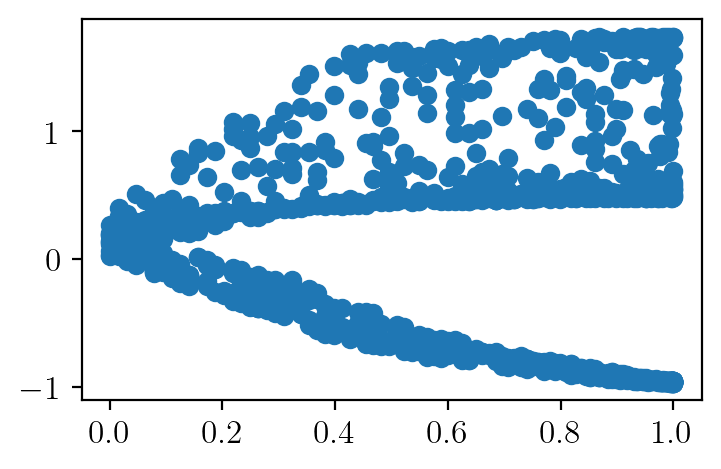

In [240]:
plt.scatter(test_conc,z_mean_test[:,0])

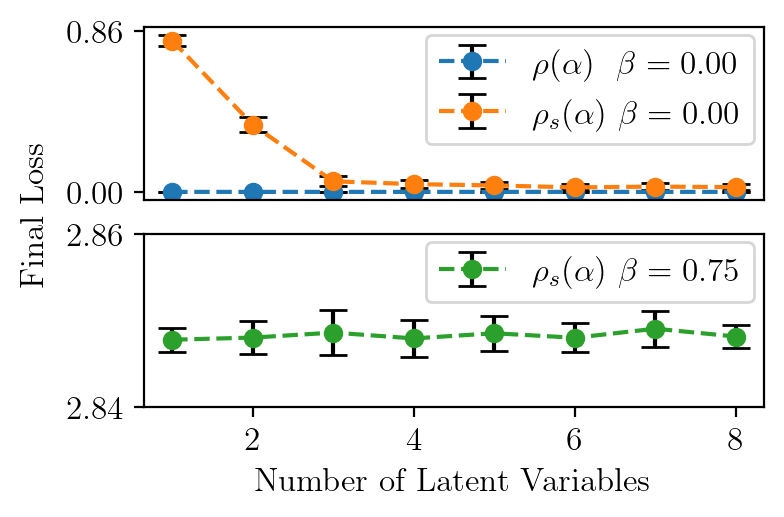

In [29]:
lat_arr = np.arange(1,9)
n_exp = 9


recon_loss_noiseless = np.zeros((len(lat_arr),n_exp, 1))
recon_loss_noise = np.zeros((len(lat_arr),n_exp, 1))
recon_loss_noise_075 = np.zeros((len(lat_arr),n_exp, 1))


for cnt_1, inx in enumerate(lat_arr):
    for cnt_2 in range(n_exp):
        read_dictionary = np.load('no_0beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noiseless[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]
        
        read_dictionary = np.load('noise_0beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noise[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]
        
        read_dictionary = np.load('noise_075beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noise_075[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]

av_recon_loss_arr_noiseless = np.average(recon_loss_noiseless,axis=1)
std_recon_loss_arr_noiseless = np.std(recon_loss_noiseless,axis=1)

av_recon_loss_arr_noise = np.average(recon_loss_noise,axis=1)
std_recon_loss_arr_noise = np.std(recon_loss_noise,axis=1)

av_recon_loss_arr_noise_075 = np.average(recon_loss_noise_075,axis=1)
std_recon_loss_arr_noise_075 = np.std(recon_loss_noise_075,axis=1)

fig, ax = plt.subplots(2,1)


# ax[0].plot(lat_arr, av_recon_loss_arr_noiseless, marker='o', markersize="5",label="$\\rho(\\alpha)\ \  \\beta=0.00$")
# ax[0].fill_between(lat_arr, (av_recon_loss_arr_noiseless - std_recon_loss_arr_noiseless).flatten(), (av_recon_loss_arr_noiseless + std_recon_loss_arr_noiseless).flatten(), alpha=0.2)

# ax[0].plot(lat_arr, av_recon_loss_arr_noise, marker='o', markersize="5",label="$\\rho_s(\\alpha)\ \\beta=0.00$")
# ax[0].fill_between(lat_arr, (av_recon_loss_arr_noise - std_recon_loss_arr_noise).flatten(), (av_recon_loss_arr_noise + std_recon_loss_arr_noise).flatten(), alpha=0.2)

# ax[1].plot(lat_arr, av_recon_loss_arr_noise_075, marker='o', markersize="5",label="$\\rho_s(\\alpha)\ \\beta=0.75$",c="green")
# ax[1].fill_between(lat_arr, (av_recon_loss_arr_noise_075 - std_recon_loss_arr_noise_075).flatten(), (av_recon_loss_arr_noise_075 + std_recon_loss_arr_noise_075).flatten(), alpha=0.2,color="green")


ax[0].errorbar(lat_arr, av_recon_loss_arr_noiseless.flatten(),std_recon_loss_arr_noiseless.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho(\\alpha)\ \  \\beta=0.00$")
ax[0].errorbar(lat_arr, av_recon_loss_arr_noise.flatten(),std_recon_loss_arr_noise.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\  \\beta=0.00$")

ax[1].errorbar(lat_arr, av_recon_loss_arr_noise_075.flatten(),std_recon_loss_arr_noise_075.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\ \\beta=0.75$",color="C2")



ax[1].set_xlabel("Number of Latent Variables")
# ax[0].set_ylabel("Final Reconstruction Loss",fontsize=12)

ax[0].set_xticks([])

ax[1].set_ylim([2.84,2.86])
ax[1].set_yticks([2.84,2.86])

ax[0].set_yticks([0,0.86])

# fig.legend(bbox_to_anchor=(0.9, 0.88))

ax[0].legend(bbox_to_anchor=(1.01, 1.05))
ax[1].legend(bbox_to_anchor=(1.01, 1.05))



fig.text(-0.03, 0.5, 'Final Loss', va='center', rotation='vertical',fontsize=12)
plt.savefig("/home/felix/Downloads/fig3_reconloss.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()

In [27]:
lat_arr = np.arange(1,9)

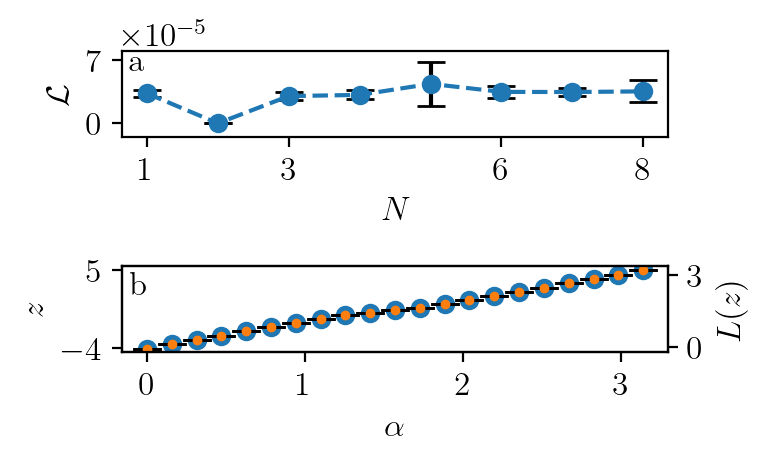

In [255]:
fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

ax[0].errorbar(lat_arr, av_recon_loss_arr_noiseless.flatten(),std_recon_loss_arr_noiseless.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho(\\alpha)\ \  \\beta=0.00$")

ax[1].errorbar(selected_alpha_noiseless[:,0],np.mean(selected_z_noiseless,axis=1),np.std(selected_z_noiseless,axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho(\\alpha)\ \\beta=0.00$")
ax22 = ax[1].twinx()
ax22.errorbar(selected_alpha_noiseless[:,0],np.mean(pred_alpha_noiseless,axis=1),np.std(pred_alpha_noiseless,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="C1",
             )

ax[0].set_xlabel("$N$")
# ax[1].set_xlabel("$C[\\rho(\\alpha)]$")
ax[1].set_xlabel("$\\alpha$")


ax[0].set_ylabel("$\\mathcal{L}$")
ax[1].set_ylabel("$z$")
ax22.set_ylabel("$L(z)$")

# fig.text(0.18, 0.89-0.065, "a")
# fig.text(0.18, 0.4-0.025, "b")
ax[0].annotate("a",xy=(0.012, 0.77), xycoords='axes fraction')
ax[1].annotate("b",xy=(0.012, 0.67), xycoords='axes fraction')


ax[0].set_ylim(-0.000015,0.00008)
ax[0].set_yticks([0.00000,0.00007])

# ax[0].set_ylim(-0.000055,0.0005)
# ax[0].set_yticks([0,0.0001])


ax[1].set_yticks([-4,5])
ax22.set_yticks([0,3])
ax[0].set_xticks([1,3,6,8])

plt.tight_layout()

plt.savefig("/home/felix/Downloads/fig_exp1.pdf",bbox_inches="tight",pad_inches=0.1)

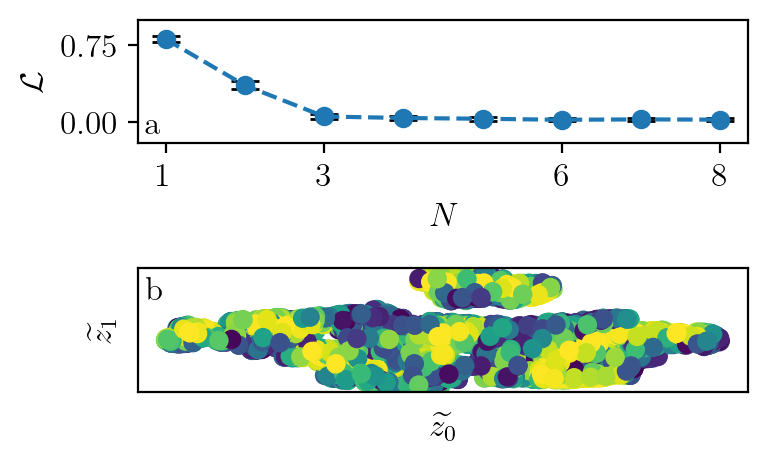

In [256]:
fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

ax[0].errorbar(lat_arr, av_recon_loss_arr_noise.flatten(),std_recon_loss_arr_noise.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\  \\beta=0.00$")

ax[0].set_xlabel("$N$")
ax[0].set_ylabel("$\\mathcal{L}$")
ax[0].set_yticks([0,0.75])
ax[0].set_ylim(-0.2,1)
ax[0].set_xticks([1,3,6,8])

ax[1].set_yticks([])
ax[1].set_xticks([])


ax[1].set_xlabel("$\\widetilde{z_0}$")
ax[1].set_ylabel("$\\widetilde{z_1}$")


ax[1].scatter(X_embedded[:,0], X_embedded[:,1] ,c=concurrence_arr[:5000])
ax[0].annotate("a",xy=(0.012, 0.075), xycoords='axes fraction')
ax[1].annotate("b",xy=(0.012, 0.75), xycoords='axes fraction')

plt.tight_layout()

plt.savefig("/home/felix/Downloads/fig_exp2.pdf",bbox_inches="tight",pad_inches=0.1)

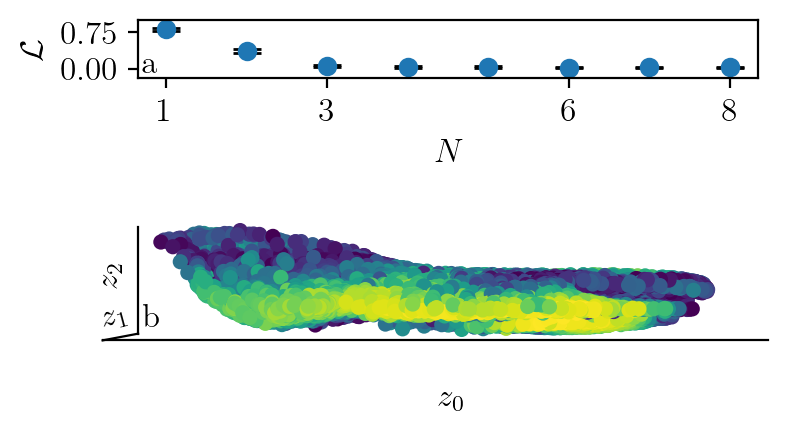

In [101]:
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         hspace=0.6, height_ratios=[1,4])
fig = plt.figure(constrained_layout=True,figsize=(fig_size_dim, 1*fig_size_dim/golden_ratio))
# fig = plt.figure(figsize=(fig_size_dim, 1*fig_size_dim/golden_ratio))


ax = fig.add_subplot(spec[0])
ax.errorbar(lat_arr, av_recon_loss_arr_noise.flatten(),std_recon_loss_arr_noise.flatten(),ls='',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\  \\beta=0.00$")

ax.set_xlabel("$N$")
ax.set_ylabel("$\\mathcal{L}$")
ax.set_yticks([0,0.75])
ax.set_ylim(-0.2,1)

ax2 = fig.add_subplot(spec[1],projection='3d',) 

ax2.get_proj = lambda: np.dot(Axes3D.get_proj(ax2), np.diag([4.15, 1, 1, 1]))

ax2.scatter(z_mean_3d[:,0], z_mean_3d[:,1],z_mean_3d[:,2], c=concurrence_arr, alpha=1,clip_on=False)
# ax2.scatter(z_mean_3d[:,2], z_mean_3d[:,1],z_mean_3d[:,0], c=concurrence_arr, alpha=1,clip_on=False) # 
# ax2.scatter(z_mean_3d[:,0], z_mean_3d[:,2],z_mean_3d[:,1], c=concurrence_arr, alpha=1,clip_on=False)
# ax2.scatter(z_mean_3d[:,1], z_mean_3d[:,2],z_mean_3d[:,0], c=concurrence_arr, alpha=1,clip_on=False)
# ax2.scatter(z_mean_3d[:,1], z_mean_3d[:,0],z_mean_3d[:,2], c=concurrence_arr, alpha=1,clip_on=False)
# ax2.scatter(z_mean_3d[:,2], z_mean_3d[:,0],z_mean_3d[:,1], c=concurrence_arr, alpha=1,clip_on=False)


fig.text(0.5, 0.1,"$z_0$")
fig.text(0.075, 0.26,"$z_1$",rotation=15)
fig.text(0.07, 0.35,"$z_2$",rotation=90)

ax2.grid(False)
ax2.xaxis.pane.set_edgecolor('white')
ax2.yaxis.pane.set_edgecolor('white')
ax2.zaxis.pane.set_edgecolor('white')

ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.zaxis.set_ticks([])
                   
fig.text(0.13, 0.773, "a")
fig.text(0.13, 0.26, "b")

ax2.view_init(0, 90)
# ax2.set_position(Bbox([[0.3660734857423326, 0.10999999999999999], [0.6589265142576675, 0.5838461538461539]]))
ax2.set_position(Bbox([[0.3660734857423326-0.04, 0.10999999999999999], [0.6589265142576675-0.04, 0.5838461538461539]]))
ax.set_xticks([1,3,6,8])

# ax2.dist = 20
# plt.subplots_adjust(wspace=5)

# ax2.set_position([1,1,1,0])

# plt.tight_layout()
# plt.savefig("/home/felix/Downloads/fig5_3dlat.pdf")#,bbox_inches="tight",pad_inches=0.1)
# plt.tight_layout()

# plt.savefig("/home/felix/Downloads/fig_exp2.pdf",bbox_inches="tight",pad_inches=0.1)

In [268]:
# fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

# ax[0].errorbar(lat_arr, av_recon_loss_arr_noise_075.flatten(),std_recon_loss_arr_noise_075.flatten(),ls='',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\ \\beta=0.75$",color="C2")


# ax[1].errorbar(selected_conc_noisy[:,0],np.mean(np.abs(selected_z_noisy),axis=1),np.std(np.abs(selected_z_noisy),axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
#               label="$\\rho_s(\\alpha)\ \\beta=0.75$")
# ax22 = ax[1].twinx()
# ax22.errorbar(selected_conc_noisy[:,0],np.mean(pred_conc_noisy,axis=1),np.std(pred_conc_noisy,axis=1),ls='',ms=2.5,marker="o",capsize=5, capthick=1, ecolor='black',color="red",
#              )

# ax[0].set_xlabel("$dim(z)$")
# ax[1].set_xlabel("$C[\\rho(\\alpha)]$")


# ax[0].set_ylabel("$\\mathcal{L}$")
# ax[1].set_ylabel("$z$")
# ax22.set_ylabel("$L(z)$")

# fig.text(0.2, 0.86, "a")
# fig.text(0.2, 0.39, "b")


# ax[0].set_yticks([2.84,2.86])

# ax[1].set_yticks([0,0.75])
# plt.tight_layout()

# # plt.savefig("/home/felix/Downloads/fig4_latentrepresentation.pdf",bbox_inches="tight",pad_inches=0.1)

In [247]:
selected_z_noisy.shape

(21, 10)

In [250]:
.shape

(21, 20)

<ErrorbarContainer object of 3 artists>

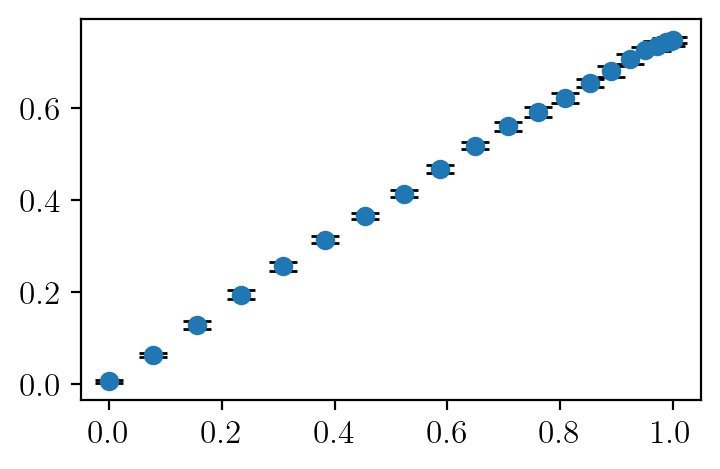

In [251]:
# selected_conc_generalized, selected_z_generalized, pred_conc_generalized, 

plt.errorbar(selected_conc_noisy[:,0],np.mean(np.concatenate((np.abs(selected_z_noisy),np.abs(selected_z_generalized)),axis=1),axis=1),
             np.std(np.concatenate((np.abs(selected_z_noisy),np.abs(selected_z_generalized)),axis=1),axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")






In [ ]:
pred_conc_noisy, pred_conc_generalized

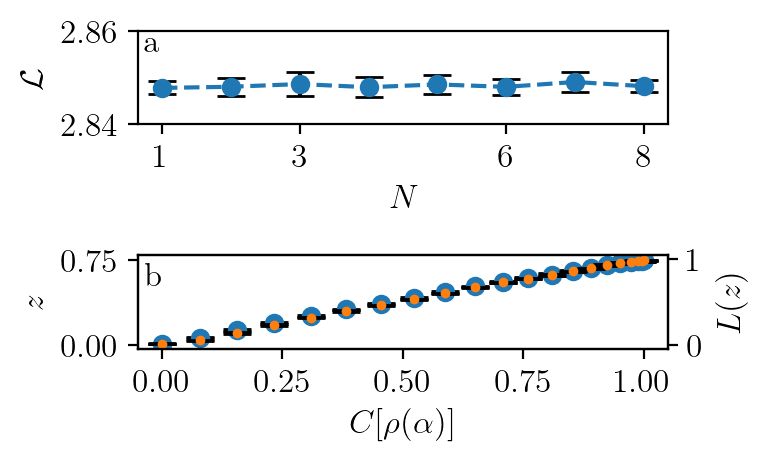

In [257]:
fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

ax[0].errorbar(lat_arr, av_recon_loss_arr_noise_075.flatten(),std_recon_loss_arr_noise_075.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\ \\beta=0.75$",
               color="C0")

ax[1].errorbar(selected_conc_noisy[:,0],np.mean(np.concatenate((np.abs(selected_z_noisy),np.abs(selected_z_generalized)),axis=1),axis=1),
             np.std(np.concatenate((np.abs(selected_z_noisy),np.abs(selected_z_generalized)),axis=1),axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax22 = ax[1].twinx()
ax22.errorbar(selected_conc_noisy[:,0],np.mean(np.concatenate((np.abs(pred_conc_noisy),np.abs(pred_conc_generalized)),axis=1),axis=1),
             np.std(np.concatenate((np.abs(pred_conc_noisy),np.abs(pred_conc_generalized)),axis=1),axis=1),ls='',ms=2.5,marker="o",capsize=5, capthick=1, ecolor='black',color="C1",
             )

ax[0].set_xlabel("$N$")
ax[1].set_xlabel("$C[\\rho(\\alpha)]$")


ax[0].set_ylabel("$\\mathcal{L}$")
ax[1].set_ylabel("$z$")
ax22.set_ylabel("$L(z)$")

ax[0].annotate("a",xy=(0.012, 0.78), xycoords='axes fraction')
ax[1].annotate("b",xy=(0.012, 0.68), xycoords='axes fraction')

ax[0].set_yticks([2.84,2.86])
ax[0].set_xticks([1,3,6,8])

ax[1].set_yticks([0,0.75])
plt.tight_layout()

plt.savefig("/home/felix/Downloads/fig_exp4.pdf",bbox_inches="tight",pad_inches=0.1)

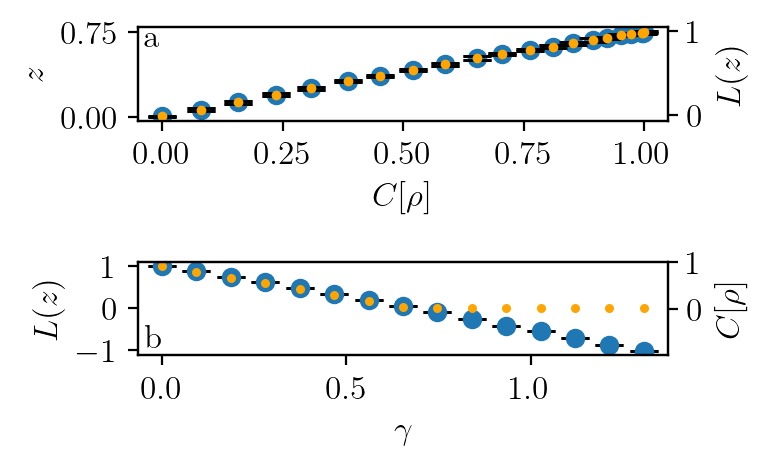

In [208]:
fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

ax[0].errorbar(np.mean(concur_arr_rc,axis=1),np.mean(np.abs(np.reshape(z_mean_rc,(21,10))),axis=1),np.std(np.abs(np.reshape(z_mean_rc,(21,10))),axis=1) ,ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_r(\\alpha)\ \\beta=0.75$")
ax12 = ax[0].twinx()
ax12.errorbar(np.mean(concur_arr_rc,axis=1),np.mean(pred_conc_rc,axis=1),np.std(pred_conc_rc,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="orange",
             )





########


ax[1].errorbar(x_10[:,0][::7],np.mean(y_10,axis=1)[::7],np.std(y_10,axis=1)[::7],ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_d(\\alpha)$",zorder=-1)

ax[1].scatter(gamma[::7],ccc[::7],color="orange", label="$C[\\rho(\\alpha)]$",s = 5,zorder=1)
ax22 = ax[1].twinx()


ax22.set_ylim([-1,1])
ax22.set_yticks([])


# ax.set_ylabel("1",c="white")
# ax12.set_ylabel("$L(z)$",c="white")

ax[1].set_xlabel("$\\gamma$")
# ax.legend(bbox_to_anchor=(0.0, 0.645), loc=2)

# ax.vlines(1-1/3,-1,1)

# plt.savefig("/home/felix/Downloads/fig8_deco.pdf",bbox_inches="tight",pad_inches=0.1)
# plt.show()    


########




ax[0].set_xlabel("$C[\\rho]$")
# ax[1].set_xlabel("$C[\\rho]$")


ax[0].set_ylabel("$z$")
ax12.set_ylabel("$L(z)$")
ax[1].set_ylabel("$L(z)$")
ax22.set_ylabel("$C[\\rho]$")

fig.text(0.2, 0.88, "a")
fig.text(0.2, 0.27, "b")


ax[0].set_yticks([0,0.75])
# ax[0].set_xticks([1,3,6,8])

ax22.set_yticks([0,1])
plt.tight_layout()

plt.savefig("/home/felix/Downloads/fig_exp5.pdf",bbox_inches="tight",pad_inches=0.1)

In [155]:
dep_arr = []
for i in range(1000):
    UaUb = np.kron(get_u(2),get_u(2))
    q =  QuantumRegister(2,"qreg")
    qc = QuantumCircuit(q)

    customUnitary = Operator(UaUb)
    qc.unitary(customUnitary, [q[0], q[1]], label='custom')

    newCircuit = transpile(qc, basis_gates=['rx','ry','rz'], optimization_level = 3)
    # newCircuit.draw()
    
    dep_arr.append(newCircuit.depth())
dep_arr = np.array(dep_arr)
np.mean(dep_arr), np.max(dep_arr)

backend = Aer.get_backend('unitary_simulator')

job = execute(newCircuit, backend, shots=8192)
result = job.result()

print(result.get_unitary(newCircuit,3))

In [104]:
def get_u(n):
    z = np.random.randn(n,n)/np.sqrt(2.0)
    q,r = np.linalg.qr(z)
    d = np.diagonal(r)
    ph = d/np.absolute(d)
    q = np.multiply(q,ph,q)
    return q

def get_random_cdm():
    state = Statevector.from_int(0, 2**2)
    state = state.evolve(random_circuit(2,5))
    return DensityMatrix(state)

# def gen_data_cdm(n):
#     cnt = 0 
#     data_arr = np.zeros((n,16))
#     conc_arr = np.zeros((n))
#     while cnt < n:
#         trial_state = get_random_cdm()
#         if np.abs(np.array(trial_state).imag).sum() == 0 and qiskit.quantum_info.concurrence(trial_state)>0:
#             data_arr[cnt] = np.array(trial_state).real.flatten()
#             conc_arr[cnt] = qiskit.quantum_info.concurrence(trial_state)
#             cnt += 1 
#     return data_arr, conc_arr
        
def gen_data_cdm():
    cnt = 0 
    data_arr = np.zeros((210,16))
    conc_arr = np.zeros((210))
    
    for c_arr in selected_conc_noisy:
        for c in c_arr:
            Found = False
            while not Found:
                trial_state = get_random_cdm()
                if np.abs(np.array(trial_state).imag).sum() == 0 and np.isclose(qiskit.quantum_info.concurrence(trial_state),c,atol=2e-2):
                    data_arr[cnt] = np.array(trial_state).real.flatten()
                    conc_arr[cnt] = qiskit.quantum_info.concurrence(trial_state)
                    cnt += 1 
                    Found = True
                    print(cnt)
            
    return data_arr, conc_arr


d,e = gen_data_cdm()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210


In [105]:
t_z,_,_ = vae_noisy.encoder.predict(d)

7/7 [==============================] - 0s 1ms/step


In [106]:
z_mean_rc, _, _ = vae_noisy.encoder.predict(d)
concur_arr_rc = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in d])

pred_conc_rc = linear_fit(np.abs(z_mean_rc[:,0]),concur_arr_rc)

z_mean_rc = np.reshape(z_mean_rc,(21,10))    
    
concur_arr_rc = np.reshape(concur_arr_rc,(21,10))

pred_conc_rc = np.reshape(pred_conc_rc,(21,10))

7/7 [==============================] - 0s 910us/step


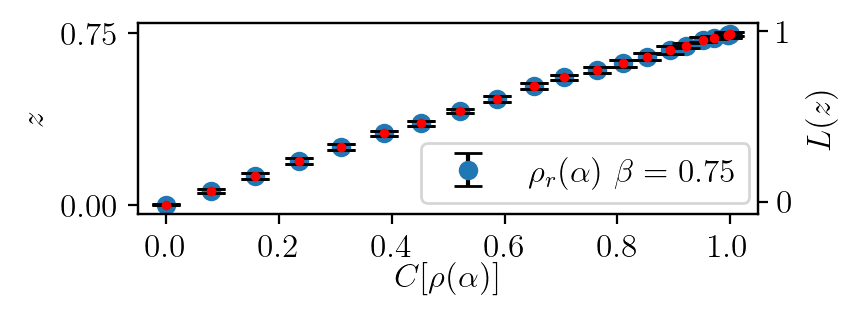

In [107]:
fig, ax = plt.subplots( figsize = (fig_size_dim, fig_size_dim/(2*golden_ratio)))
ax.errorbar(np.mean(concur_arr_rc,axis=1),np.mean(np.abs(np.reshape(z_mean_rc,(21,10))),axis=1),np.std(np.abs(np.reshape(z_mean_rc,(21,10))),axis=1) ,ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_r(\\alpha)\ \\beta=0.75$")
ax12 = ax.twinx()
ax12.errorbar(np.mean(concur_arr_rc,axis=1),np.mean(pred_conc_rc,axis=1),np.std(pred_conc_rc,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="red",
             )

ax.set_xlabel("$C[\\rho(\\alpha)]$",labelpad=0)

ax.set_yticks([0,0.75])
ax12.set_yticks([0,1])

ax.legend(bbox_to_anchor=(0.43, 0.46), loc=2)

plt.subplots_adjust(hspace=0.5)
ax.set_ylabel("$z$")
ax12.set_ylabel("$L(z)$")
plt.savefig("/home/felix/Downloads/fig7_randomcircuit.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()    

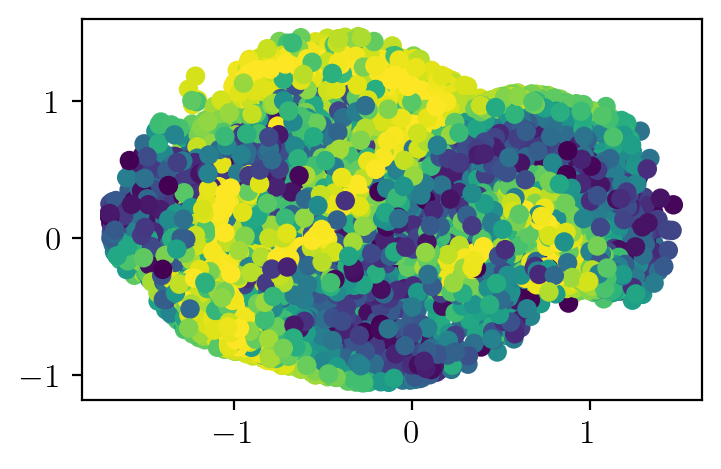

In [213]:
plt.scatter(z_mean_3d[:,0],z_mean_3d[:,1],c = concurrence_arr)

In [3]:
%matplotlib inline
# %matplotlib notebook
from sklearn.model_selection import train_test_split
import numpy as np
import qutip as qt
from sklearn.manifold import TSNE
from vae import * 

2023-04-18 16:41:53.835496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 16:41:54.009605: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-18 16:41:54.030719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-18 16:41:54.030733: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [4]:
fig_size_dim    = 4
golden_ratio    = (1+np.sqrt(5))/2
fig_size        = (fig_size_dim, fig_size_dim/golden_ratio)

def plot_style():
    font_size       = 12
    dpi             = 200

    params = {'figure.figsize': fig_size,
              'figure.dpi': dpi,
              'savefig.dpi': dpi,
              'font.size': font_size,
              'font.family': "serif",
              'figure.titlesize': font_size,
              'legend.fontsize': font_size,
              'axes.labelsize': font_size,
              'axes.titlesize': font_size,
              'xtick.labelsize': font_size,
              'ytick.labelsize': font_size,
              'text.usetex': True,
             }

    plt.rcParams.update(params)
plot_style()

# Noiseless Dataset

Load Dataset

In [5]:
n_angle = 101
n_samples = 1000
rho_arr_noiseless = np.load('unitary_4x4_101_1000_noiseless.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr_noiseless))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1

X_train, X_test, y_train, y_test = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

Define Hyperparameters:

In [6]:
batch_size = 64
beta = 0.0
learning_rate = 0.0001
lat_dim = 1
hidden_act = "relu"
final_act = "tanh"

Load trained VAE:

In [7]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noiseless.h5")
decoder.load_weights("decoder_noiseless.h5")

vae_noiseless = VAE(encoder, decoder, beta)
vae_noiseless.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae_noiseless.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae_noiseless.encoder.predict(X_test)

2023-04-18 16:42:39.694098: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-18 16:42:39.694120: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-18 16:42:39.694136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (felix-Latitude-5521): /proc/driver/nvidia/version does not exist
2023-04-18 16:42:39.694601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


790/790 [==============================] - 1s 760us/step


Investigate Latent Space

In [25]:
def linear_fit(x,y):
    fit_obj = np.polyfit(x, y, 1)
    fit_pred = np.poly1d(fit_obj)
    
    return np.reshape(fit_pred(x),(21,10))

def gen_plot_data(rho_array, vae_trained):
    idx = np.round(np.linspace(0, len(scan_arr) - 1, 21)).astype(int)
    selected_rho = np.zeros((21,10,16))
    selected_alpha = np.array([[scan_arr[i]]*10 for i in idx]).flatten()
    cnt = 0 
    for i in idx*1000:
        selected_rho[cnt] = rho_array[i:i+10] 
        cnt += 1 

    selected_rho_reshape = np.reshape(selected_rho,(210,16))
    z_mean, _, _ = vae_trained.encoder.predict(selected_rho_reshape)
    concur_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in selected_rho_reshape])
        
    pred_conc = linear_fit(np.abs(z_mean[:,0]),concur_arr)
    pred_alpha = linear_fit(z_mean[:,0],selected_alpha)
    
    return np.reshape(selected_alpha,(21,10)), np.reshape(concur_arr,(21,10)), np.reshape(z_mean,(21,10)), np.reshape(pred_conc,(21,10)), np.reshape(pred_alpha,(21,10))
     
selected_alpha_noiseless, selected_conc_noiseless, selected_z_noiseless, pred_conc_noiseless, pred_alpha_noiseless = gen_plot_data(rho_arr_noiseless, vae_noiseless)  
selected_alpha_noisy, selected_conc_noisy, selected_z_noisy, pred_conc_noisy, pred_alpha_noisy = gen_plot_data(rho_arr_noisy, vae_noisy)  
selected_alpha_generalized, selected_conc_generalized, selected_z_generalized, pred_conc_generalized, pred_alpha_generalized = gen_plot_data(rho_arr_noiseless, vae_noisy)      

7/7 [==============================] - 0s 738us/step


In [ ]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

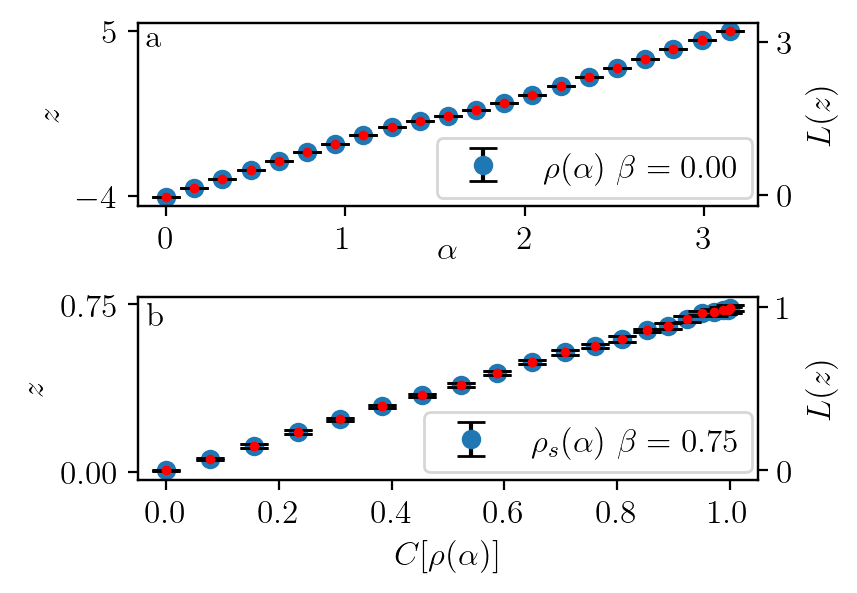

In [31]:
fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1.2*fig_size_dim/golden_ratio))
ax[0].errorbar(selected_alpha_noiseless[:,0],np.mean(selected_z_noiseless,axis=1),np.std(selected_z_noiseless,axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho(\\alpha)\ \\beta=0.00$")
ax12 = ax[0].twinx()
ax12.errorbar(selected_alpha_noiseless[:,0],np.mean(pred_alpha_noiseless,axis=1),np.std(pred_alpha_noiseless,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="red",
             )




ax[1].errorbar(selected_conc_noisy[:,0],np.mean(np.abs(selected_z_noisy),axis=1),np.std(np.abs(selected_z_noisy),axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax22 = ax[1].twinx()
ax22.errorbar(selected_conc_noisy[:,0],np.mean(pred_conc_noisy,axis=1),np.std(pred_conc_noisy,axis=1),ls='',ms=2.5,marker="o",capsize=5, capthick=1, ecolor='black',color="red",
             )


ax[1].set_xlabel("$C[\\rho(\\alpha)]$")
ax[0].set_xlabel("$\\alpha$",labelpad=-7)


ax[0].set_ylabel("$z$")
ax[1].set_ylabel("$z$")

ax12.set_ylabel("$L(z)$")
ax22.set_ylabel("$L(z)$")




fig.text(0.135, 0.84, "a")
fig.text(0.135, 0.37, "b")



ax[0].set_yticks([-4,5])
ax12.set_yticks([0,3])

ax[1].set_yticks([0,0.75])
# ax22.set_yticks([0,3])



ax[0].legend(bbox_to_anchor=(0.455, 0.46), loc=2)
ax[1].legend(bbox_to_anchor=(0.435, 0.46), loc=2)


plt.subplots_adjust(hspace=0.5)
# plt.margins(x=0, y=0)
# plt.tight_layout()
plt.savefig("/home/felix/Downloads/fig4_latentrepresentation.pdf",bbox_inches="tight",pad_inches=0.1)
# plt.show()    



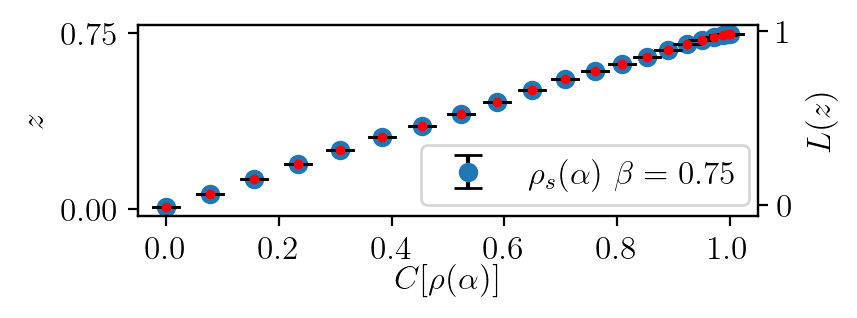

In [56]:
fig, ax = plt.subplots( figsize = (fig_size_dim, fig_size_dim/(2*golden_ratio)))
ax.errorbar(selected_conc_generalized[:,0],np.mean(selected_z_generalized,axis=1),np.std(selected_z_generalized,axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax12 = ax.twinx()
ax12.errorbar(selected_conc_generalized[:,0],np.mean(pred_conc_generalized,axis=1),np.std(pred_conc_generalized,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="red",
             )

ax.set_xlabel("$C[\\rho(\\alpha)]$",labelpad=0)

ax.set_yticks([0,0.75])
ax12.set_yticks([0,1])

ax.legend(bbox_to_anchor=(0.43, 0.46), loc=2)

plt.subplots_adjust(hspace=0.5)
ax.set_ylabel("$z$")
ax12.set_ylabel("$L(z)$")
plt.savefig("/home/felix/Downloads/fig9_nonoise.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()    

In [ ]:
def test_partial_transpose_bipartite(rho):
    """partial transpose of bipartite systems"""

    rho = Qobj(np.arange(16).reshape(4, 4), dims=[[2, 2], [2, 2]])

    # no transpose
    rho_pt = partial_transpose(rho, [0, 0])
    assert_(np.abs(np.max(rho_pt.full() - rho.full())) < 1e-12)

    # partial transpose subsystem 1
    rho_pt = partial_transpose(rho, [1, 0])
    rho_pt_expected = np.array([[0, 1,  8,  9],
                                [4, 5, 12, 13],
                                [2, 3, 10, 11],
                                [6, 7, 14, 15]])
    assert_(np.abs(np.max(rho_pt.full() - rho_pt_expected)) < 1e-12)

    # partial transpose subsystem 2
    rho_pt = partial_transpose(rho, [0, 1])
    rho_pt_expected = np.array([[0, 4, 2, 6],
                                [1, 5, 3, 7],
                                [8, 12, 10, 14],
                                [9, 13, 11, 15]])
    assert_(np.abs(np.max(rho_pt.full() - rho_pt_expected)) < 1e-12)

    # full transpose
    rho_pt = partial_transpose(rho, [1, 1])
    assert_(np.abs(np.max(rho_pt.full() - rho.trans().full())) < 1e-12)

In [186]:

ttt = np.array([qt.partial_transpose(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]]),[1,0]).eigenenergies() for dm in rho_gamma])
tpos = np.array([np.any(t < 0) for t in ttt])
gamma[tpos]
gamma

memmap([0.        , 0.01333333, 0.02666667, 0.04      , 0.05333333,
        0.06666667, 0.08      , 0.09333333, 0.10666667, 0.12      ,
        0.13333333, 0.14666667, 0.16      , 0.17333333, 0.18666667,
        0.2       , 0.21333333, 0.22666667, 0.24      , 0.25333333,
        0.26666667, 0.28      , 0.29333333, 0.30666667, 0.32      ,
        0.33333333, 0.34666667, 0.36      , 0.37333333, 0.38666667,
        0.4       , 0.41333333, 0.42666667, 0.44      , 0.45333333,
        0.46666667, 0.48      , 0.49333333, 0.50666667, 0.52      ,
        0.53333333, 0.54666667, 0.56      , 0.57333333, 0.58666667,
        0.6       , 0.61333333, 0.62666667, 0.64      , 0.65333333,
        0.66666667, 0.68      , 0.69333333, 0.70666667, 0.72      ,
        0.73333333, 0.74666667, 0.76      , 0.77333333, 0.78666667,
        0.8       , 0.81333333, 0.82666667, 0.84      , 0.85333333,
        0.86666667, 0.88      , 0.89333333, 0.90666667, 0.92      ,
        0.93333333, 0.94666667, 0.96      , 0.97

In [175]:
eigenvalues = partial_transpose.eigenenergies()
    if np.any(eigenvalues < 0):

array([[ 0.16666667+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.33333333+0.j, -0.16666667+0.j,
         0.        +0.j],
       [ 0.        +0.j, -0.16666667+0.j,  0.33333333+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.16666667+0.j]])

In [118]:
gamma_10 = np.repeat(gamma,10)#np.reshape(np.repeat(gamma,10),(101,10))

rho_gamma_10 = np.repeat(rho_gamma,10,axis=0)#np.repeat(rho_gamma,10),(101,10,16))

In [119]:
z_mean_gamma_10, _, _ = vae_noisy.encoder.predict(rho_gamma_10)

test_10 = z_mean_gamma_10.flatten()*2 + (1-z_mean_gamma_10.flatten()[0]*2)

test_10 = z_mean_gamma_10.flatten()*2.01267278 -0.52129492

32/32 [==============================] - 0s 889us/step


In [120]:
x_10 = np.reshape(gamma_10,(101,10))
y_10 = np.reshape(test_10,(101,10))

In [123]:
# 

ccc_inx = [np.array(ccc)>0]
x = z_mean_gamma.flatten()[ccc_inx]#gamma[ccc_inx]
y = np.array(ccc)[ccc_inx]

fit_obj = np.polyfit(x, y, 1)
fit_pred = np.poly1d(fit_obj)


fit_pred(x)
fit_pred

/tmp/ipykernel_17363/455522865.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = z_mean_gamma.flatten()[ccc_inx]#gamma[ccc_inx]
/tmp/ipykernel_17363/455522865.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y = np.array(ccc)[ccc_inx]


poly1d([ 2.0362794 , -0.56291172])

In [128]:
x = gamma
y = test

fit_obj = np.polyfit(x, y, 1)
fit_pred = np.poly1d(fit_obj)
fit_obj

array([-1.56971412,  1.05954081])

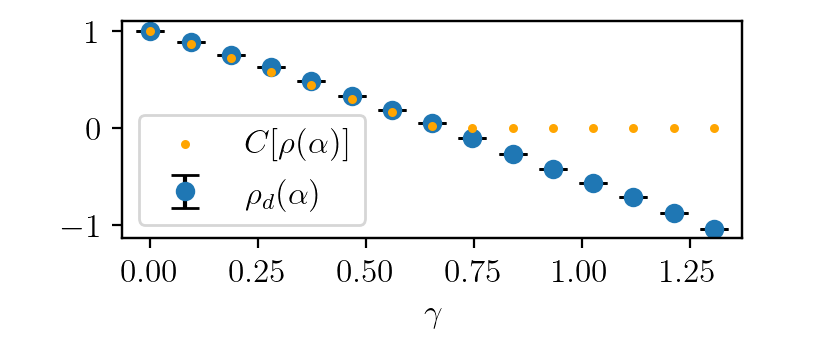

In [129]:
fig, ax = plt.subplots(figsize = (fig_size_dim, fig_size_dim/(1.75*golden_ratio)))


# ax.errorbar(x_10[:,0][::7],np.mean(y_10,axis=1)[::7],np.std(y_10,axis=1)[::7],ls='',marker="o",capsize=5, capthick=1, ecolor='black',
#               label="$L(z)$",zorder=-1)
ax.errorbar(x_10[:,0][::7],np.mean(y_10,axis=1)[::7],np.std(y_10,axis=1)[::7],ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_d(\\alpha)$",zorder=-1)

ax.scatter(gamma[::7],ccc[::7],color="orange", label="$C[\\rho(\\alpha)]$",s = 5,zorder=1)
ax12 = ax.twinx()

# ax12.scatter(gamma[::7],ccc[::7],color="orange", label="$C[\\rho(\\alpha)]$",s = 5)

ax12.set_ylim([-1,1])
ax12.set_yticks([])

# ax12.errorbar(selected_conc_generalized[:,0],np.mean(pred_conc_generalized,axis=1),np.std(pred_conc_generalized,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="red",
#              )

# ax.scatter(gamma[::5],test[::5], label="$L(z)$")

ax.set_ylabel("1",c="white")
ax12.set_ylabel("$L(z)$",c="white")

ax.set_xlabel("$\\gamma$")
ax.legend(bbox_to_anchor=(0.0, 0.645), loc=2)

# ax.vlines(1-1/3,-1,1)

# plt.savefig("/home/felix/Downloads/fig8_deco.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()    

# Noisy Dataset  $\beta = 0$

Load Dataset

In [7]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

Define Hyperparameters:

In [8]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 1
hidden_act = "tanh"
final_act = "linear"

Load trained VAE:

In [9]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noise_0beta.h5")
decoder.load_weights("decoder_noise_0beta.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 430us/step


Investigate Latent Space

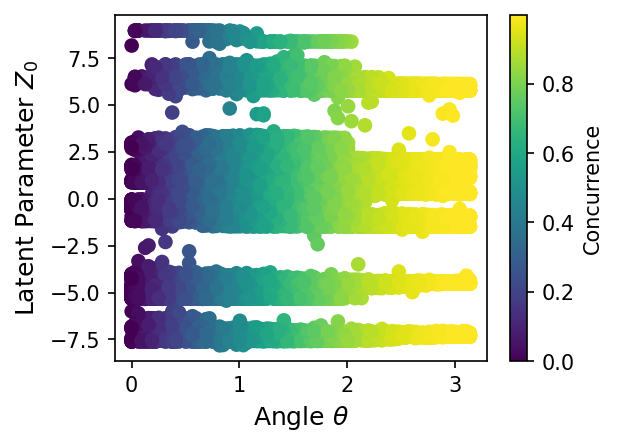

In [10]:
plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

# Noisy Dataset  $0.75\beta$

Load Dataset

In [9]:
n_angle = 101
n_samples = 1000
rho_arr_noisy = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr_noisy))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr_noisy, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

In [10]:
rr_arr = np.array([qt.entropy_vn(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]]).ptrace(0)) for dm in X_test])

In [186]:
# sort_inx = np.argsort(y_test)
# plt.plot(rr_arr[sort_inx])

Define Hyperparameters:

In [11]:
batch_size = 64
beta = 0.75
learning_rate = 0.0001
lat_dim = 1
hidden_act = "tanh"
final_act = "linear"

Load trained VAE:

In [12]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noise_075beta.h5")
decoder.load_weights("decoder_noise_075beta.h5")

vae_noisy = VAE(encoder, decoder, beta)
vae_noisy.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae_noisy.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae_noisy.encoder.predict(X_test)

790/790 [==============================] - 1s 842us/step


Investigate Latent Space

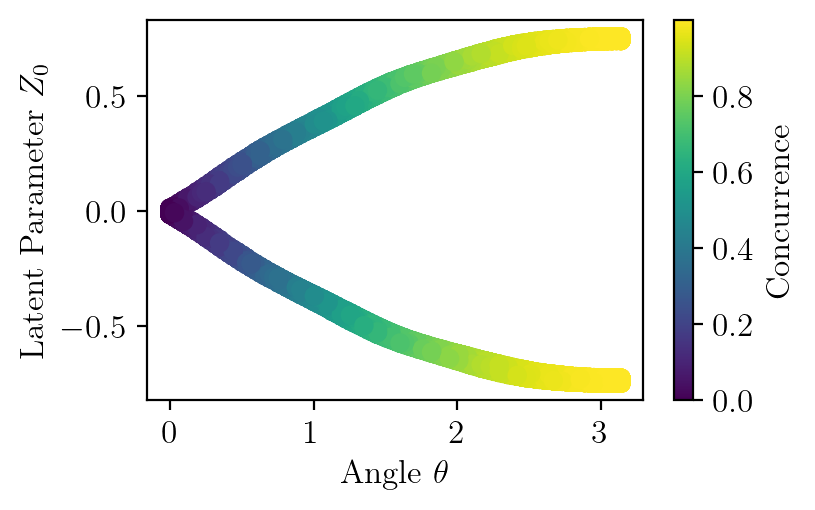

In [13]:
plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

Investigate generalization and relation to concurrence 


In [15]:
rho_arr_noiseless = np.load('unitary_4x4_101_1000_noiseless.npy', mmap_mode="r")
_, X_test_noiseless, _, y_test_noiseless = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
z_mean_noiseless, _, _ = vae_noisy.encoder.predict(X_test_noiseless)

790/790 [==============================] - 1s 663us/step


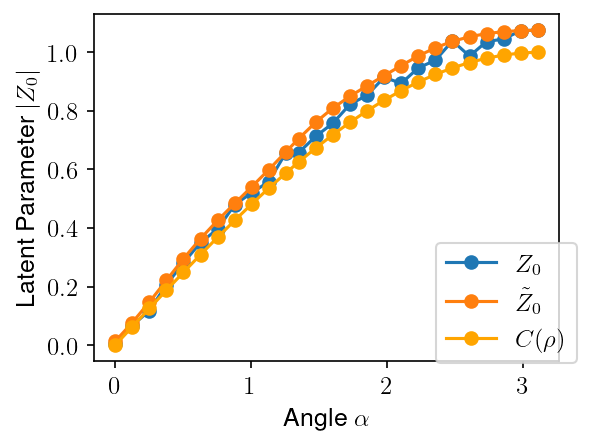

In [40]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,0][::1000])/np.log(2),"-o", label="$Z_0$") 
ax.plot(y_test[sort_inx][::1000], z_mean_noiseless[sort_inx][:,0][::1000]/np.log(2),"-o", label=" $\\tilde{Z}_0$") 


ax.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

# ax.plot(y_test[sort_inx][::1000],rr_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")


# ax2 = ax.twinx()

# ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)

In [8]:
rho_arr_deco = np.load('unitary_4x4_101_1000_deco_01.npy', mmap_mode="r")
_, X_test_deco, _, y_test_deco = train_test_split(rho_arr_deco, alpha_arr, random_state=42)
z_mean_deco, _, _ = vae.encoder.predict(X_test_deco)

concurrence_deco_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test_deco])

790/790 [==============================] - 1s 647us/step


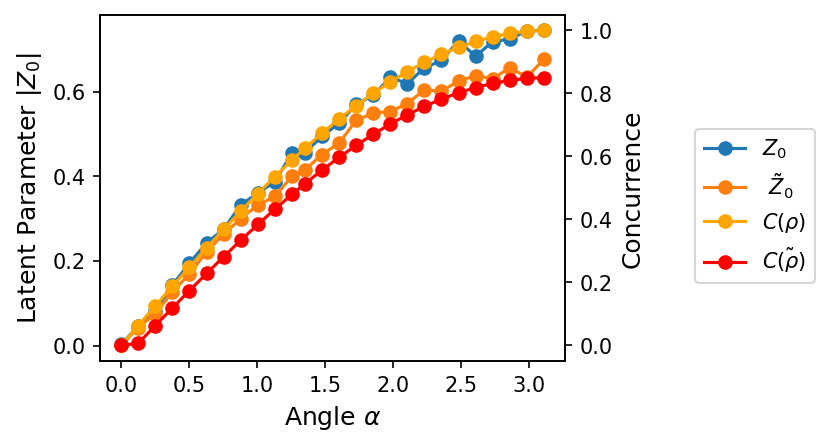

In [9]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,0][::1000]),"-o", label="$Z_0$") 
ax.plot(y_test[sort_inx][::1000], np.abs(z_mean_deco[sort_inx][:,0][::1000]),"-o", label=" $\\tilde{Z}_0$") 


ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")
ax2.plot(y_test[sort_inx][::1000],concurrence_deco_arr[sort_inx][::1000],"-o", c="red",label= "$\\tilde{C(\\rho)}$")


ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(1.1, 0.65), loc=2)

In [60]:
rr_arr = np.array([qt.entropy_vn(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]]).ptrace(1)) for dm in rho_gamma])

In [63]:
dm = rho_gamma[-1]
qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.16666667  0.          0.         -0.16666667]
 [ 0.          0.33333333  0.          0.        ]
 [ 0.          0.          0.33333333  0.        ]
 [-0.16666667  0.          0.          0.16666667]]

In [135]:
from qiskit.quantum_info import Statevector, DensityMatrix, entropy, partial_trace
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute

def circuit(theta):
    q = QuantumRegister(2,'q')
    circuit = QuantumCircuit(q)
    circuit.h(q[0])
    circuit.cry(theta,q[0],q[1])
    return circuit

def get_dm(theta):
    state = Statevector.from_int(0, 2**2)
    state = state.evolve(circuit(theta))
    return DensityMatrix(state)


def get_u(n):
    z = np.random.randn(n,n)/np.sqrt(2.0)
    q,r = np.linalg.qr(z)
    d = np.diagonal(r)
    ph = d/np.absolute(d)
    q = np.multiply(q,ph,q)
    return q

def apply_u(dm):
    UaUb = qt.Qobj(np.kron(get_u(2),get_u(2)),dims = [[2, 2], [2, 2]])
    return  UaUb * dm * UaUb.dag()  

def gen_angle_circ(n_points, n_samples, max_epsilon):
    th_scan_template = np.linspace(0, np.pi, n_points)
    th_scan = np.zeros((n_points, n_samples))
    for cnt, theta in enumerate(th_scan_template):
        th_scan[cnt] = theta + max_epsilon * np.random.uniform(-1, 1, size=n_samples)
    return th_scan

def apply_deco(alpha, dm):
#     return alpha*dm  + (1 - alpha)/2**2 * dm.tr() * qt.identity([2,2])
    return (1 - alpha)*dm  + alpha/2**2 * qt.identity([2,2])

dm = get_dm(np.pi)

# r_1 = apply_deco(0,apply_u( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
# r_2 = apply_deco(0.1,apply_u( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))


r_1 = apply_deco(0,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
r_2 = apply_deco(0.1,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
r_3 = apply_deco(0.2,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))


In [177]:
r_4 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real
r_5 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real
r_6 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real

r_4_arr = r_4.full().real.flatten()
r_5_arr = r_5.full().real.flatten()
r_6_arr = r_6.full().real.flatten()

qt.concurrence(r_4), qt.concurrence(r_5), 


test_arr = [qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]]) for i in range(100)]
test_a = [i.full().real.flatten() for i in test_arr]
c_a = [qt.concurrence(i) for i in test_arr]


In [179]:
z_m, _, _ = vae_noisy.encoder.predict(np.array(test_a))

4/4 [==============================] - 0s 1ms/step


In [138]:
z_m, _, _ = vae_noisy.encoder.predict(np.array([r_1_arr,r_2_arr,r_3_arr]))

1/1 [==============================] - 0s 13ms/step


In [122]:
ccc = [qt.concurrence(qt.Qobj(np.reshape(dm,(4,4)),dims=[[2,2],[2,2]])) for dm in rho_gamma]


In [117]:
gamma = np.load('/home/felix/Downloads/gamma_new.npy', mmap_mode="r")
rho_gamma = np.load('/home/felix/Downloads/rho_gamma_noiseless.npy', mmap_mode="r")



z_mean_gamma, _, _ = vae_noisy.encoder.predict(rho_gamma)

4/4 [==============================] - 0s 2ms/step


In [125]:
offset = 1-z_mean_gamma.flatten()[0]

In [126]:
test = (1-gamma)*z_mean_gamma.flatten() #+ gamma/2

In [127]:
test = z_mean_gamma.flatten()*2 + (1-z_mean_gamma.flatten()[0]*2)

# Multiple Experiments

# Beta Scan

In [15]:
def kl_loss(mu,sig):
    return -0.5 * (1 + sig - mu**2 - np.exp(sig))

In [39]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

In [40]:
batch_size = 64
learning_rate = 0.0001
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [18]:
inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}

In [94]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("grid_8/encoder_{}_grid_8.h5".format("06"))
decoder.load_weights("grid_8/decoder_{}_grid_8.h5".format("06"))

vae = VAE(encoder, decoder, 0.6)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

In [95]:
z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 550us/step


In [96]:
for i in range(8):
        print(i,np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))) 

0 1.5961298e-07
1 6.6453313e-06
2 1.0719458e-05
3 1.4605027e-07
4 4.732577e-06
5 5.812338e-08
6 0.30667377
7 3.104198e-07


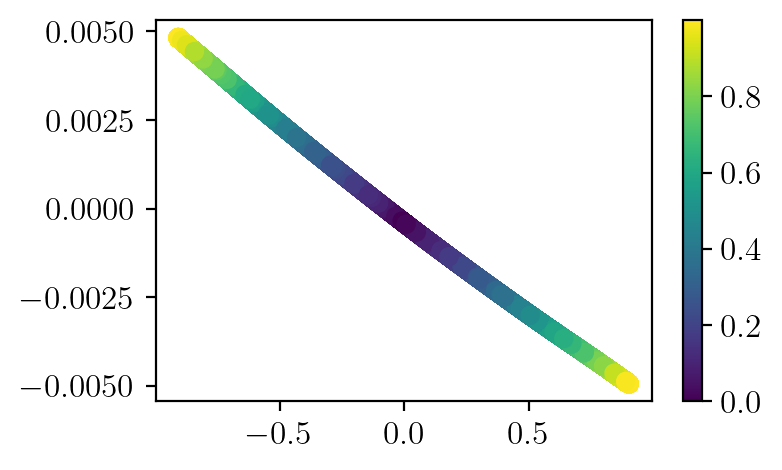

In [98]:
plot_scatter(z_mean[:,6], z_mean[:,1],concurrence_arr,"","","",1)
# plot_scatter(y_test, z_mean[:,6],concurrence_arr,"","","",1)

In [99]:
z_06_1 = z_mean[:,6]
z_06_2 = z_mean[:,1]

# z_001_1 = z_mean[:,4]
# z_001_2 = z_mean[:,5]

# z_03_1 = z_mean[:,1]
# z_03_2 = z_mean[:,7]

# z_05_1 = z_mean[:,6]
# z_05_2 = z_mean[:,7]

In [41]:
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("grid_8/encoder_{}_grid_8.h5".format(inx))
    decoder.load_weights("grid_8/decoder_{}_grid_8.h5".format(inx))

    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean, z_log_var, z = vae.encoder.predict(X_test)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean[:,i].astype(np.float64), z_log_var[:,i].astype(np.float64)).astype(np.float64))
    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

790/790 [==============================] - 0s 483us/step


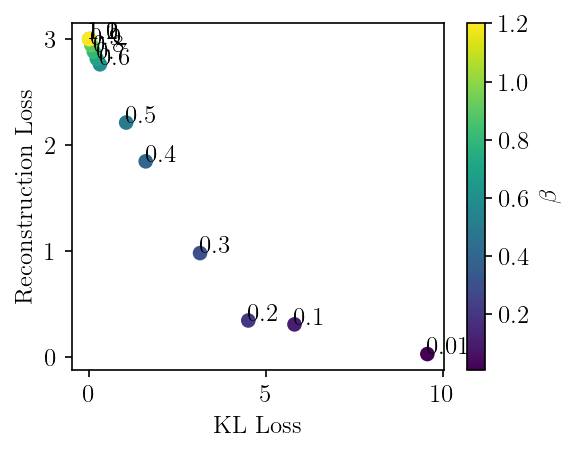

In [32]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)
im = ax.scatter(kl_loss_arr, recon_loss_arr, c=list(inx_dict.values()))
cbar = fig.colorbar(im)
cbar.set_label("$\\beta$")
plt.xlabel("KL Loss")
plt.ylabel("Reconstruction Loss")


for i, txt in enumerate(inx_dict.values()):
    ax.annotate(txt, (kl_loss_arr[i], recon_loss_arr[i]))

plt.show()

In [25]:
["$Z_{7}$","$Z_{6}$","$Z_{5}$","$Z_{4}$","$Z_{3}$","$Z_{2}$","$Z_{1}$","$Z_{0}$"]

beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

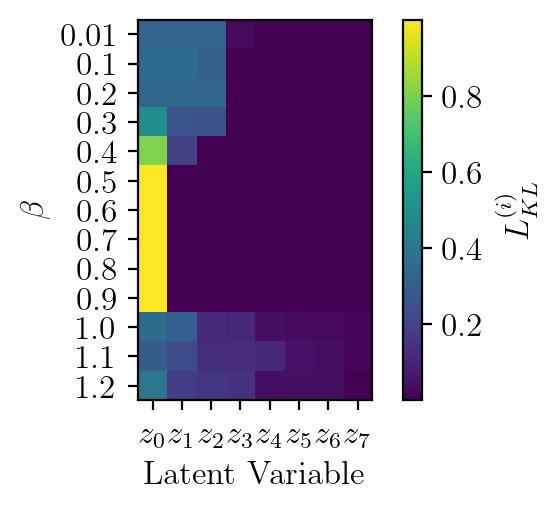

In [57]:
row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

fig, ax = plt.subplots()
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

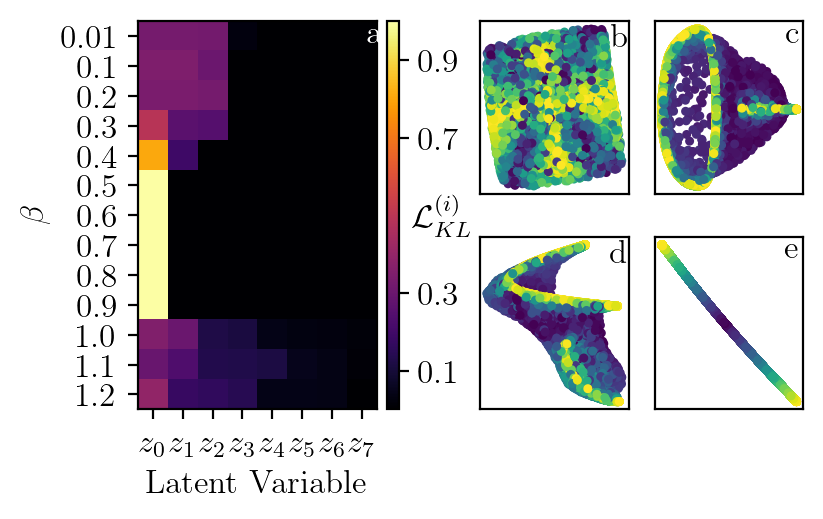

In [111]:
fig = plt.figure(constrained_layout=True)
axs = fig.subplot_mosaic([['Left', 'Top1','Top2'],['Left', 'Bottom1','Bottom2']],
                          gridspec_kw={'width_ratios':[2,0.8,0.8]})


im = axs['Left'].imshow(np.flip(new_matrix,axis=1),cmap="inferno")

divider = make_axes_locatable(axs['Left'])
cax = divider.append_axes('right', size='5%', pad=0.05)

cbar = plt.colorbar(im, cax=cax, orientation='vertical')
cbar.set_ticks([0.1,0.3,0.7,0.9])

axs['Left'].set_xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
axs['Left'].set_yticks(range(len(inx_dict)),["${}$".format(i) for i in beta_list])     

axs['Left'].set_xlabel("Latent Variable")
axs['Left'].set_ylabel("$\\beta$")

axs["Top1"].set_xticks([])
axs["Top1"].set_yticks([])
axs["Top2"].set_xticks([])
axs["Top2"].set_yticks([])
axs["Bottom1"].set_xticks([])
axs["Bottom1"].set_yticks([])
axs["Bottom2"].set_xticks([])
axs["Bottom2"].set_yticks([])

axs["Top1"].scatter(z_001_1,z_001_2, c= concurrence_arr,s=5)
axs["Top2"].scatter(z_04_1,z_04_2, c= concurrence_arr,s=5)
axs["Bottom1"].scatter(z_05_1,z_05_2, c= concurrence_arr,s=5)
axs["Bottom2"].scatter(z_06_2,z_06_1, c= concurrence_arr,s=5)



fig.text(0.444, 0.94, "a",c="white")
fig.text(0.748, 0.932, "b")
fig.text(0.968, 0.94, "c")

fig.text(0.748, 0.495, "d")
fig.text(0.966, 0.505, "e")

fig.text(0.5,0.565,"$\\mathcal{L}_{KL}^{(i)}$")


plt.savefig("/home/felix/Downloads/figBETA.pdf",bbox_inches="tight",pad_inches=0.1)

# 3 LV with ramp

In [17]:
batch_size = 64
beta = 0.0
learning_rate = 0.0001
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_00beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_00beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean_3d, _, _ = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 458us/step


[]

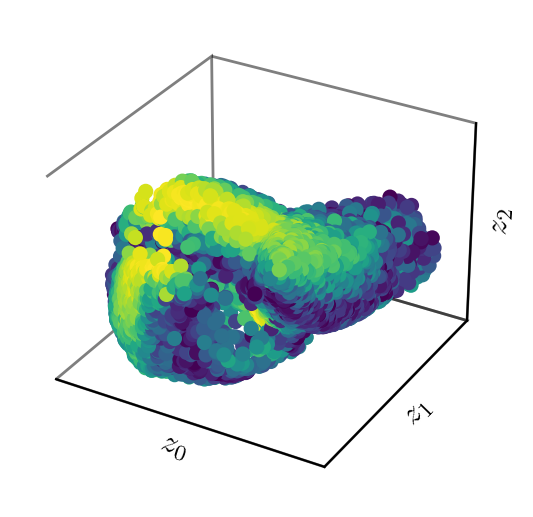

In [20]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(projection='3d')

ax.scatter(z_mean_3d[:,0], z_mean_3d[:,2],z_mean_3d[:,1], c=concurrence_arr, alpha=1)

ax.set_xlabel("$z_0$",labelpad=-15)
ax.set_ylabel("$z_1$",labelpad=-15,)
ax.set_zlabel("$z_2$",labelpad=-15)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
                
# plt.tight_layout()

# plt.savefig("/home/felix/Downloads/fig5_3dlat.pdf",bbox_inches='tight')#,bbox_inches="tight",pad_inches=0.1)

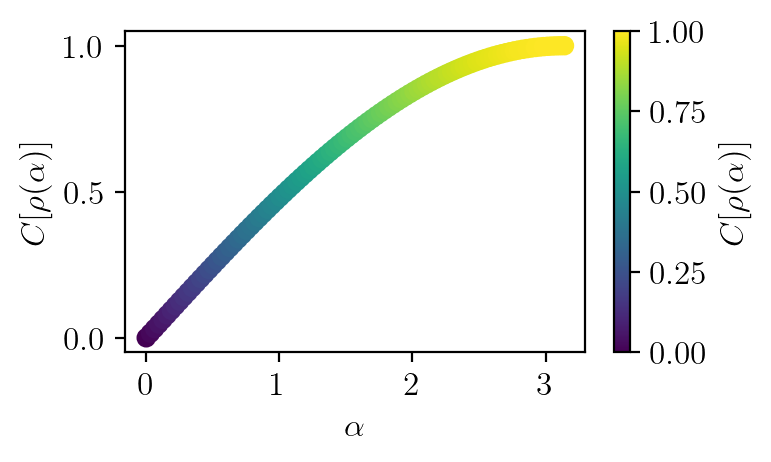

In [24]:
X_train, X_test, y_train, y_test = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
aaaaaaa = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])
aaaaaaa = np.unique(aaaaaaa)
fig,ax = plt.subplots()
im = ax.scatter(scan_arr,aaaaaaa,c=aaaaaaa)
ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$C[\\rho(\\alpha)]$")
cbar = fig.colorbar(im)
cbar.set_label("$C[\\rho(\\alpha)]$")
plt.tight_layout()
plt.savefig("/home/felix/Downloads/fig10_concurrence.pdf")

/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


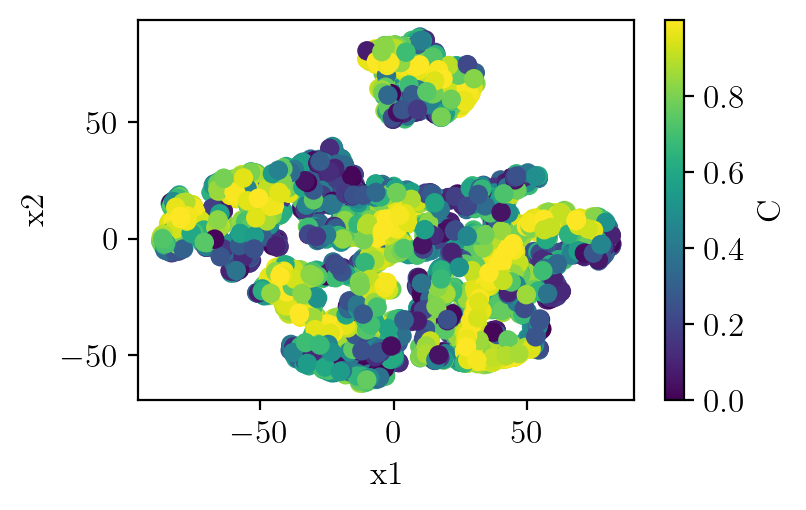

In [178]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean_3d[:5000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:5000],"x1","x2","C", 1)

In [181]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(z_mean_3d[:5000])

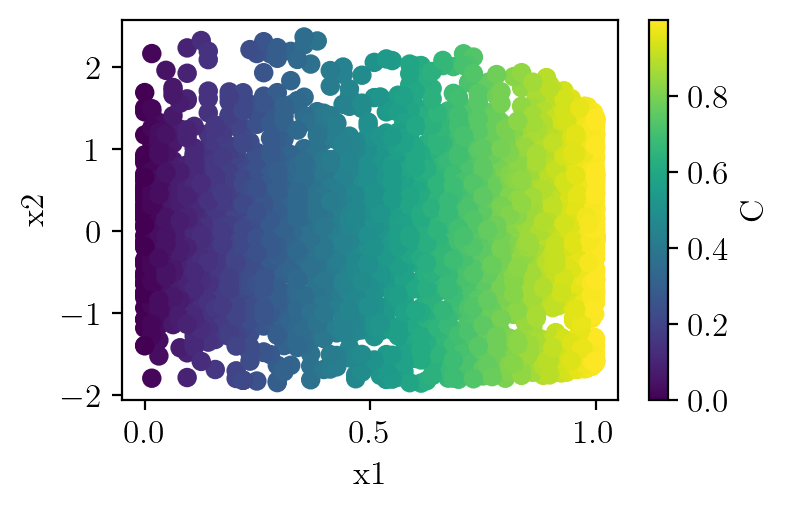

In [184]:
# plot_scatter(pca_trans[:,0], pca_trans[:,1] , concurrence_arr[:5000],"x1","x2","C", 1)
plot_scatter(concurrence_arr[:5000], pca_trans[:,0] , concurrence_arr[:5000],"x1","x2","C", 1)

# 3 LV without ramp

In [101]:
batch_size = 64
beta = 0.00
learning_rate = 0.005
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

In [145]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_00beta_noramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_00beta_noramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 496us/step


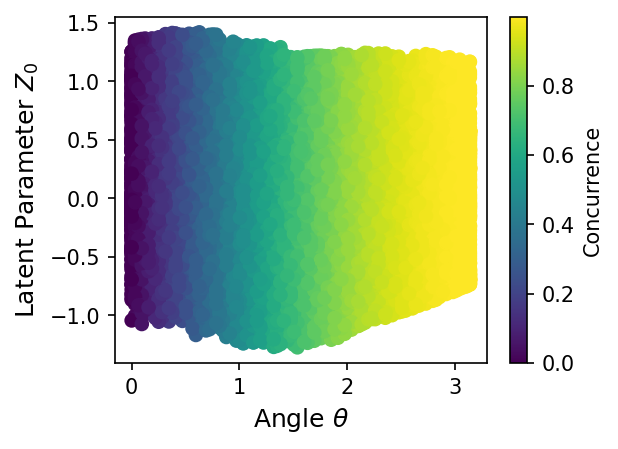

In [146]:
plot_scatter(y_test,z_mean[:,1],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

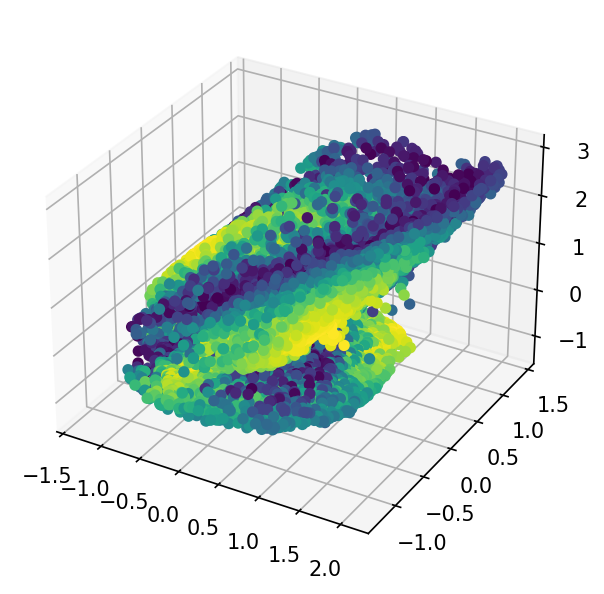

In [147]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(projection='3d')
ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr,alpha=1)

# 8 LV with ramp

In [125]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [138]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_8lv_00beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_8lv_00beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 529us/step


/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


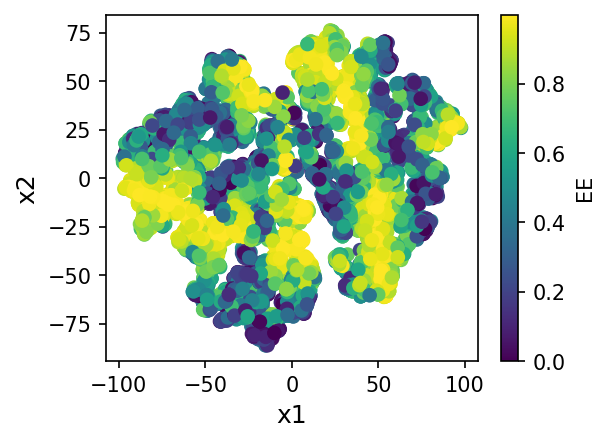

In [140]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:10000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:10000],"x1","x2","concurrence", 1)

# 8 LV without ramp

In [133]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [134]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_8lv_00beta_noramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_8lv_00beta_noramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 534us/step


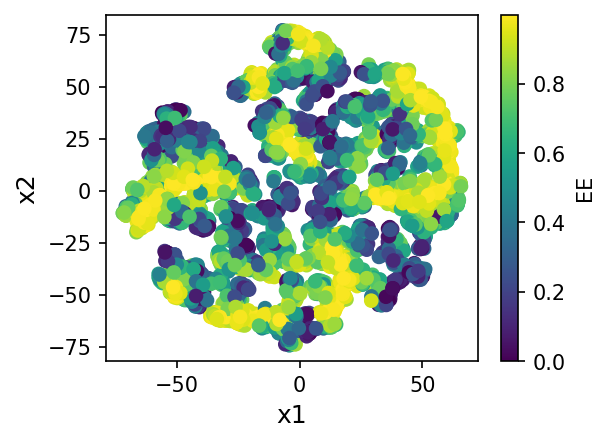

In [136]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:5000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:5000],"x1","x2","EE", 1)